In [22]:
from matplotlib.pylab import plt
import numpy as np
import pickle
from PIL import Image
import cv2

In [86]:
def ReadImage(path):
    img = Image.open(path)
    c_img = img.convert("P")
    palette = c_img.getpalette()
    a_img = np.array(c_img)
    return a_img,palette
def img_to_txt(I):
    sh = I.shape
    im = np.ravel(I, order='F')
    T = ''
    for i in im:
        T += chr(int(i))
    return T,sh

def txt_to_img(T,sh):
    M = []
    for i in T:
        M.append(ord(i))
    return np.array(M).reshape(sh,order='F')
def codage_LZW(M):
    w = ""
    code = []
    dict_size = 256
    D = {chr(i): i for i in range(dict_size)}
    for c in M:
        wc = w + c
        if wc in D:
            w = wc
        else:
            code.append(D[w])
            D[wc] = dict_size
            dict_size += 1
            w = c
    if w:
        code.append(D[w])
    return code
def decodage_LZW(M):
    dict_size = 256
    D = {i: chr(i) for i in range(dict_size)}
    w = chr(M[0])
    M = M[1:]
    code = w
    e = w
    for i in M:
        if i in D.keys():
            e = D[i]
        elif i == dict_size:
            e = w + w[0]
        code += e
        D[dict_size] = w + e[0]
        dict_size += 1
        w = e
    return code
def LZW_img(I,op):
    if op == "decodage":
        i_img = txt_to_img(decodage_LZW(I[770:]),I[:2])
        c_img = Image.fromarray(i_img.astype(np.uint8),"P")
        c_img.putpalette(I[2:770].tolist())
        return c_img
    elif op == "codage":
        C = img_to_txt(I[0])
        CC = []
        CC.extend(C[1])
        CC.extend(I[1])
        CC.extend(codage_LZW(C[0]))
        return np.array(CC)
    else :
        return "choix n'exeite pas"

In [13]:
img = ReadImage("1.jpg")
L = LZW_img(img,"codage")

In [14]:
print(L)

[   800   1200      0 ...  17510 126221   2490]


In [15]:
with open("verticalTest1.irm",'ab') as op:
    op.write(L.tobytes())

In [16]:
with open("verticalTest1.irm",'rb') as op:
    res = np.frombuffer(op.read(),dtype=int)

In [17]:
res

array([   800,   1200,      0, ...,  17510, 126221,   2490])

In [18]:
d_img_test = LZW_img(res,"decodage")
d_img_test.show()

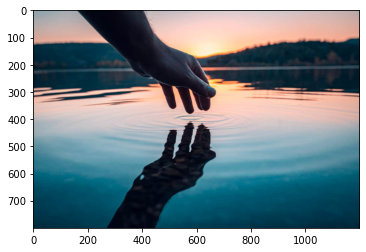

In [19]:
plt.imshow(d_img_test)
plt.show()

(1280, 1920, 3)


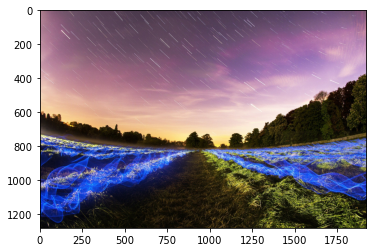

In [73]:
img = plt.imread("sample_1920×1280.bmp")
imgshape=img.shape
print(imgshape)
plt.imshow(img)
plt.show()

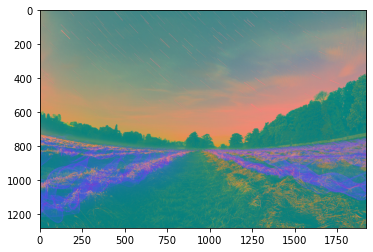

In [74]:
yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
cv2.imwrite("yuv00.jpg", yuv)
plt.imshow(yuv)
plt.show()

In [75]:
print(yuv)

[[[144 150 126]
  [150 150 126]
  [145 150 126]
  ...
  [ 97 145 134]
  [101 147 135]
  [106 147 135]]

 [[150 150 126]
  [144 150 126]
  [143 150 126]
  ...
  [ 98 145 134]
  [100 146 135]
  [102 147 135]]

 [[142 150 126]
  [138 150 126]
  [140 150 126]
  ...
  [101 145 134]
  [102 146 135]
  [102 146 135]]

 ...

 [[  8 128 130]
  [  4 128 130]
  [  9 128 129]
  ...
  [ 30 127 111]
  [ 82 132  84]
  [136 132  82]]

 [[  9 128 129]
  [  1 128 129]
  [ 10 128 129]
  ...
  [142 132  75]
  [164 133  74]
  [152 133  73]]

 [[  7 128 129]
  [  0 128 129]
  [  6 128 129]
  ...
  [143 132  70]
  [117 133  69]
  [ 67 129  90]]]


In [76]:
img = ReadImage("yuv00.jpg")
L = LZW_img(img,"codage")

In [77]:
L

array([  1280,   1920,      0, ..., 462423, 334460,  19761])

In [78]:
with open("verticalTestlumchrom.irm",'wb') as op:
    op.write(L.tobytes())

In [79]:
with open("verticalTestlumchrom.irm",'rb') as op:
    res = np.frombuffer(op.read(),dtype=int)

In [80]:
print(res)

[  1280   1920      0 ... 462423 334460  19761]


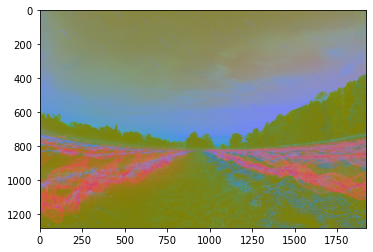

In [83]:
d_img_test = LZW_img(res,"decodage")
plt.imshow(d_img_test)
plt.show()

In [87]:
t=d_img_test.convert("RGB")
z=np.array(t)

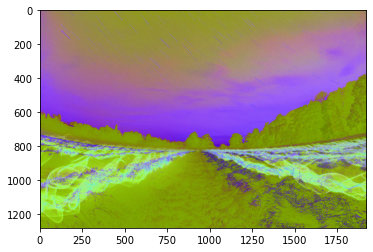

In [88]:
y = cv2.cvtColor(z, cv2.COLOR_YCrCb2RGB)

plt.imshow(y)

plt.show()